In [21]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from numpy import linalg as LA


[[0.8734294  0.96854066]
 [0.86919454 0.53085569]]
Problem Status: optimal
[[-2.65837297]
 [ 2.39731919]]
3.337079252473717


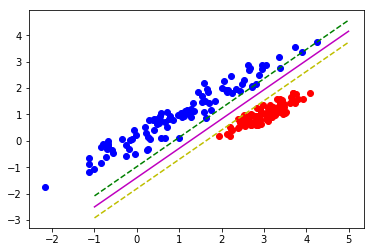

In [95]:
"Defining clusters"
d = 2   # Dimension is 2
m = 100 # Number of points in each class
n = 100  

x_center = [1,1]  
y_center = [3,1]  

"The method seed() sets the integer starting value used in generating random numbers."
"The seed method is used to initialize the pseudorandom number generator in Python."
"If you provide same seed value before generating random data it will produce the same data."


np.random.seed(8)  

"Rand creates an array of specified shape and fills it with random values."
# Define random orientations for the two clusters
orientation_x = np.random.rand(2,2) #2X2 array of random numbers
print(orientation_x)
orientation_y = np.random.rand(2,2)

"Clip (limit) the values in an array. Given an interval, values outside the interval are clipped to the interval edges."
# Generate unit-normal points
rx = np.clip(np.random.randn(m,d),-2,2)
ry = np.clip(np.random.randn(n,d),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)

# Check out our clusters!
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')





"STRONG MARGIN CONDITION SVM"


import cvxpy
from cvxpy import *
"CVXPY is a Python-embedded modeling language for convex optimization problems. "

## OPTIMIZATION- in CvxPy!

a = Variable((d,1))
b = Variable()

obj = Minimize((norm(a,2)))

x_constraints = [a.T * x[i] + b >= 1  for i in range(m)]
y_constraints = [a.T * y[i] + b <= -1 for i in range(n)]

constraints = x_constraints +  y_constraints  

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

p = a.value
q = b.value
print(p)
print(q)



#x = 0 : 0.1 : 5;
#y = (-q - p[0]*x)/p[1];
#plot(x,y)

m = (-q - p[0]*x)/p[1]
x = np.linspace(-1, 5, 20)
plt.plot(x, (-q - (p[0]*x))/p[1] , 'm')

plt.plot(x, (-q - (p[0]*x)+1)/p[1] ,'g--')


plt.plot(x, (-q - (p[0]*x)-1)/p[1] , 'y--')


plt.show()






In [98]:
import numpy as np
import numpy.linalg as la


class Kernel(object):
   
    def linear():
        def f(x, y):
            return np.inner(x, y)
        return f

    def gaussian(sigma):
        def f(x, y):
            exponent = -np.sqrt(la.norm(x-y) ** 2 / (2 * sigma ** 2))
            return np.exp(exponent)
        return f

    def _polykernel(dimension, offset):
        def f(x, y):
            return (offset + np.dot(x, y)) ** dimension
        return f

    def inhomogenous_polynomial(dimension):
        return Kernel._polykernel(dimension=dimension, offset=1.0)

    def homogenous_polynomial(dimension):
        return Kernel._polykernel(dimension=dimension, offset=0.0)

    def hyperbolic_tangent(kappa, c):
        def f(x, y):
            return np.tanh(kappa * np.dot(x, y) + c)
        return f

[[0.22199317 0.87073231]
 [0.20671916 0.91861091]]
Problem Status: optimal
[[-3.1192793 ]
 [ 0.75151883]]
3.4565771635642517


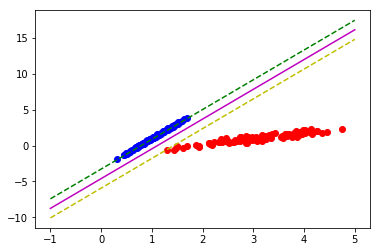

In [99]:
"Defining clusters"
d = 2   # Dimension is 2
m = 100 # Number of points in each class
n = 100  

x_center = [1,1]  
y_center = [3,1]  

"The method seed() sets the integer starting value used in generating random numbers."
"The seed method is used to initialize the pseudorandom number generator in Python."
"If you provide same seed value before generating random data it will produce the same data."


np.random.seed(5)  

"Rand creates an array of specified shape and fills it with random values."
# Define random orientations for the two clusters
orientation_x = np.random.rand(2,2) #2X2 array of random numbers
print(orientation_x)
orientation_y = np.random.rand(2,2)

"Clip (limit) the values in an array. Given an interval, values outside the interval are clipped to the interval edges."
# Generate unit-normal points
rx = np.clip(np.random.randn(m,d),-2,2)
ry = np.clip(np.random.randn(n,d),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)

# Check out our clusters!
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')





"STRONG MARGIN CONDITION SVM"


import cvxpy
from cvxpy import *
"CVXPY is a Python-embedded modeling language for convex optimization problems. "

## OPTIMIZATION- in CvxPy!

a = Variable((d,1))
b = Variable()

obj = Minimize((norm(a,2)))

x_constraints = [a.T * x[i] + b >= 1  for i in range(m)]
y_constraints = [a.T * y[i] + b <= -1 for i in range(n)]

constraints = x_constraints +  y_constraints  

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

p = a.value
q = b.value
print(p)
print(q)



#x = 0 : 0.1 : 5;
#y = (-q - p[0]*x)/p[1];
#plot(x,y)

m = (-q - p[0]*x)/p[1]
x = np.linspace(-1, 5, 20)
plt.plot(x, (-q - (p[0]*x))/p[1] , 'm')

plt.plot(x, (-q - (p[0]*x)+1)/p[1] ,'g--')


plt.plot(x, (-q - (p[0]*x)-1)/p[1] , 'y--')


plt.show()



